#Student Name: Vipul Popat
#Student ID:18195121

**Problem Statement**

When two dice are rolled, find the probability of getting a greater number on the first die than the one on the second, given that the sum should equal 8.

**Solution**

Let the event of getting a greater number on the first die be G.

There are 5 ways to get a sum of 8 when two dice are rolled = {(2,6),(3,5),(4,4), (5,3),(6,2)}.

And there are two ways where the number on the first die is greater than the one on the second given that the sum should equal 8, G = {(5,3), (6,2)}.

Therefore, P(Sum equals 8) = 5/36 and P(G) = 2/36.

Now, P(G|sum equals 8)         = P(G and sum equals 8)/P(sum equals 8)

= (2/36)/(5/36)

= 2/5

In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def roll_dices(n):
    '''This function simulates the rolling of two dices'''
    rolls = []
    for i in range(n):
        roll_dice1 = random.randint(1,6)
        roll_dice2 = random.randint(1,6)
        rolls.append([roll_dice1, roll_dice2, roll_dice1 + roll_dice2])
    return rolls


In [3]:
def experiment(number_of_runs):
    """ This function returns the samples for the number of runs specified"""
    samples = []
    for run in range(number_of_runs):
        dices_roll = roll_dices(6)
        samples.append(dices_roll)
    return [item for sublist in samples for item in sublist]

def samples_for_sum(samples_list, value):
    return list(filter(lambda x: x[2] == value, samples_list))

def samples_for_first_gt_second(samples_list):
    return list(filter(lambda x: x[0] > x[1], samples_list))
    

In [4]:
number_of_runs = 2000
sampleslist = experiment(number_of_runs)
count_of_sum_8 = 0
count_of_sum_8_where_first_gt_second = 0

no_of_samples = len(sampleslist)
sample_of_sum_8 = samples_for_sum(sampleslist, 8)
count_of_sum_8 = len(sample_of_sum_8)
count_of_sum_8_where_first_gt_second = len(samples_for_first_gt_second(sample_of_sum_8))

print("Number of runs = ", number_of_runs)
print("Number of samples = ", no_of_samples)
print("Number of samples where sum = 8 = ", count_of_sum_8)
print("Number of samples where sum = 8 and first dice > second dice = ", count_of_sum_8_where_first_gt_second)


Number of runs =  2000
Number of samples =  12000
Number of samples where sum = 8 =  1630
Number of samples where sum = 8 and first dice > second dice =  642


In [5]:
np_sampleslist = np.array(sampleslist)
standard_deviation = np.std(np_sampleslist[:,2])
median_roll = np.median(np_sampleslist[:,2])
average_roll = np.sum(np_sampleslist[:,2]) / no_of_samples
count_of_sum_8_percentage = (count_of_sum_8 / no_of_samples) * 100
count_of_sum_8_where_first_gt_second_percentage = (count_of_sum_8_where_first_gt_second / no_of_samples) * 100

In [6]:
print("The median roll is {} with standard_deviation {} and the average roll is {}".format(str(median_roll), str(standard_deviation), str(average_roll)))
print("The percentage chance that the sum of rolls is equal 8 is {}".format(count_of_sum_8_percentage))
print("The percentage chance that the sum of rolls  = 8 with first > second is {}".format(count_of_sum_8_where_first_gt_second_percentage))

The median roll is 7.0 with standard_deviation 2.4145533734120592 and the average roll is 6.996083333333333
The percentage chance that the sum of rolls is equal 8 is 13.583333333333334
The percentage chance that the sum of rolls  = 8 with first > second is 5.35


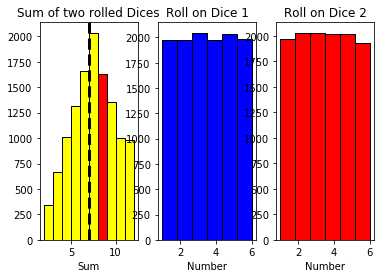

In [7]:
_,my_plot = plt.subplots(1,3)
my_plot[0].set_title("Sum of two rolled Dices")
my_plot[0].set_xlabel("Sum")
n, bins, patches = my_plot[0].hist(np_sampleslist[:,2], facecolor='yellow', edgecolor='black')
patches[6].set_fc('r')
my_plot[0].axvline(np_sampleslist[:,2].mean(), color='k', linestyle='dashed', linewidth=3)

my_plot[1].set_title("Roll on Dice 1")
my_plot[1].set_xlabel("Number")
my_plot[1].hist(np_sampleslist[:,0], 6, facecolor='blue', edgecolor='black')

my_plot[2].set_title("Roll on Dice 2")
my_plot[2].set_xlabel("Number")
my_plot[2].hist(np_sampleslist[:,1], 6, facecolor='red', edgecolor='black')

plt.show()

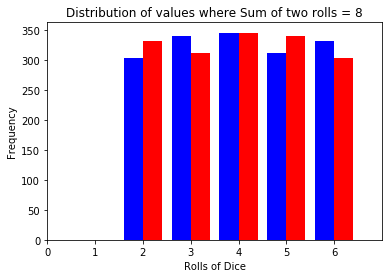

In [10]:
np_samples_of_sum_8 = np.array(sample_of_sum_8)
# Setup the histogram
plt.title("Distribution of values where Sum of two rolls = 8")
plt.xlabel("Rolls of Dice")
plt.ylabel("Frequency")

plt.xticks(range(7))
plt.xlim(0,7)

bins = np.arange(1,8) - 0.5
labels = ['first', 'second']
plt.hist(np_samples_of_sum_8[:,:2], bins, histtype='bar', color = ['b','r'], label=labels)
plt.show()

The Plot above shows the calculated probability as mentioned in the problem statement i.e. 2/5.
Out of the 5 possible options of sum of the two rolled dices = 8, only 2 would be of the type where number on dice1 > number of dice2

The idea to plot the histogram above was given by Mark Murnane which shows the probability I calculated manually above in the problem statement.